<a target="_blank" href="https://colab.research.google.com/github/visze/foundations_in_medicine/blob/master/biomedical_databases/tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 🧬 Tutorial Biomedical Databases

## 🧬 Background

Several genes are linked to hereditary cancer, including **BRCA1**, **BRCA2**, and **TP53**. These genes play a crucial role in the body's ability to repair DNA damage and regulate cell growth. 🔬 Mutations in these genes can lead to an increased risk of developing certain types of cancer, particularly breast and ovarian cancer.

### ❓Question


> **💡 Look up the gene TERT in various databases. What is its function, and what diseases are associated with mutations in this gene?**


Besides coding mutations, regulatory mutations can also impact gene function. Gene coding regions constitute only around 2% of the human genome, while regulatory regions make up a much larger portion (up to 15-20% depending on the source). Their main purpose is to regulate the expression of genes. 🧫 Every cell has the same sequence of DNA, but their purpose, shape, etc., differ. We can define two different aspects of regulation:

1. **🗺️ Spatial regulation:**
   - Organs
   - Cell types
   - Single cells (e.g., different immune cells)
2. **⏱️ Temporal regulation:**
   - Cell cycle phase
   - Differentiation phase
   - Developmental stage
   - Induced transcription (environmental stimuli)

The regulation of transcription is controlled by the binding of proteins or RNA to regulatory nucleic acid sequences. These sequences are often classified into **promoters** and **enhancers**.

**🚦 Promoters** are typically located directly upstream of the gene they regulate and serve as the binding site for RNA polymerase and other transcription factors necessary for initiating transcription. **⚡ Enhancers**, on the other hand, can be located far away from the gene they regulate (upstream, downstream, or even within introns) and function to increase the transcriptional activity of a gene by providing additional binding sites for transcription factors.

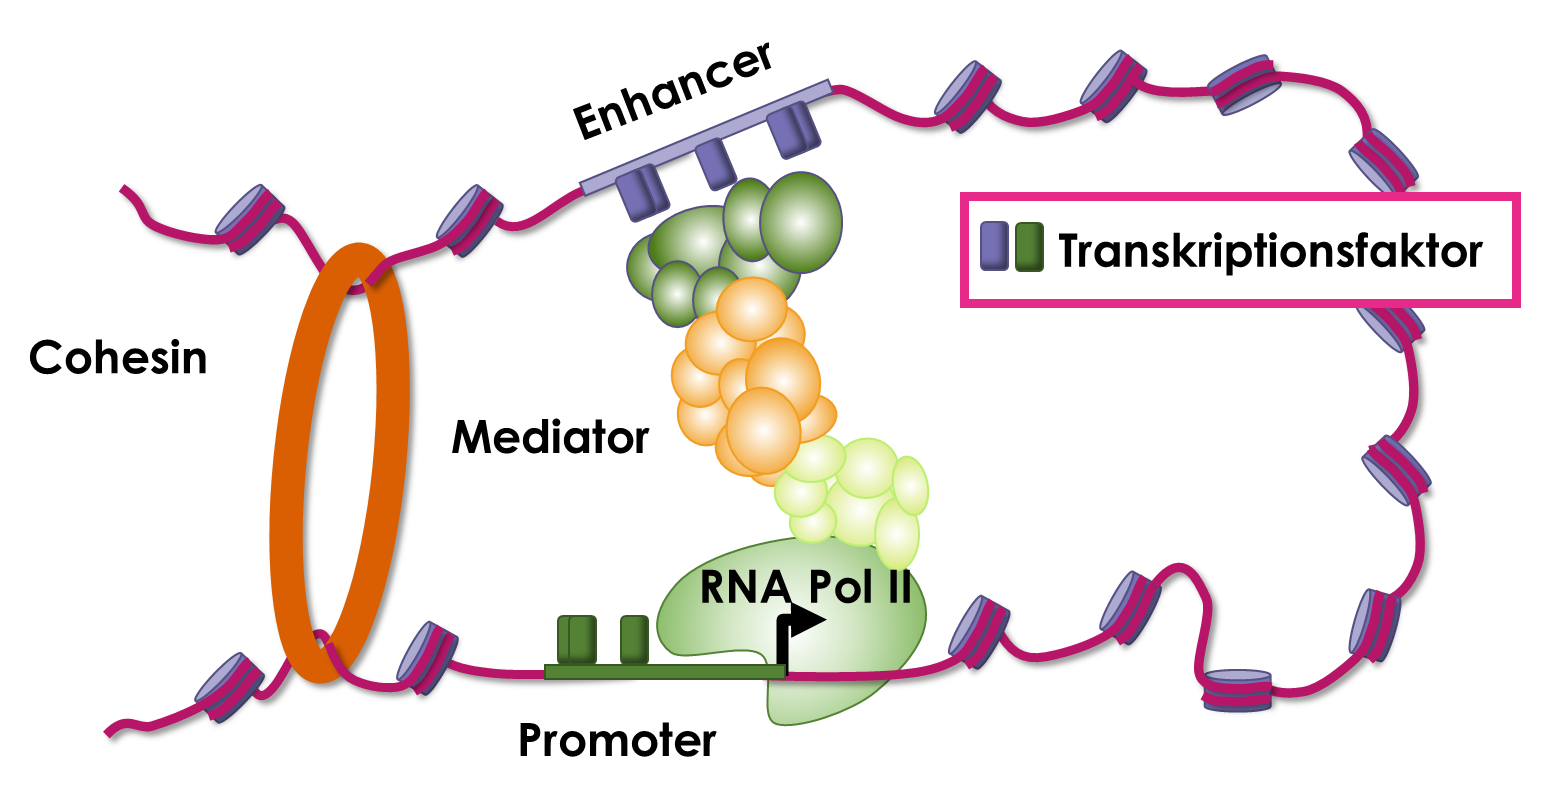

Mutations in regulatory regions can affect gene expression levels, leading to diseases such as cancer. 🦠 TERT promoter mutations have been identified in various cancers, including melanoma, glioblastoma, and bladder cancer. These mutations can lead to increased TERT expression, which may contribute to the uncontrolled growth of cancer cells. 📈

## 🔍 Variants in the TERT promoter region

Now we will look up different databases to find information about variants in the TERT promoter region. 📚 We'll try to solve this question "programmatically"—this means using code to query the databases instead of using their web interfaces (when it makes sense). 💻

### ❓Question

> **💡 Find out the genomic coordinates (GRCh38) of the TERT promoter region.**

📌 Helpful resources:
- [UCSC Genome Browser](https://genome.ucsc.edu/) 🌐
- [ENCODE SCREEN database](https://screen.wenglab.org). SCREEN is a database derived from ENCODE data. They annotate candidate cis-regulatory elements (cCREs) in the human and mouse genomes based on a large number of functional genomics experiments. 🧪

### 🌍 Population variants from gnomAD

GnomAD uses [GraphQL](https://graphql.org/) to provide programmatic access to their database. 🔌 GraphQL is an alternative to REST APIs. Instead of multiple endpoints, there is only one endpoint. The user defines the structure of the response data in the request. ✨

First we need to install the GQL GraphQL client library for Python. 📦

In [1]:
%%bash
pip install gql

Starting with GraphQL is not that easy. 🤔 GnomAD has a (very short) documentation here: https://gnomad.broadinstitute.org/data#api.

However, it only shows you the `gene` query. But there is more! 🎯 You have `region`, `transcript`, `variant`, and many more searches. You can find them out by clicking on this link: https://gnomad.broadinstitute.org/api?

### ❓ TODO

> **💡 Insert your region in the query by replacing `<chr_number>`, `<start_position>`, `<end_position>`**

In [2]:
from gql import gql, Client
from gql.transport.aiohttp import AIOHTTPTransport

transport = AIOHTTPTransport(url="https://gnomad.broadinstitute.org/api")
client = Client(transport=transport, fetch_schema_from_transport=True)

query = gql(
    """
      
    query RegionQuery {

      region(chrom: "5", start: 1294944, stop: 1295294, reference_genome: GRCh38) {
        variants(dataset: gnomad_r4) {
          variant_id
          chrom
          pos
          ref
          alt
          joint {
            ac
            an
          }
        }
      }
    }
    """
)
result = await client.execute_async(query)
print(result)

{'region': {'variants': [{'variant_id': '5-1294944-T-C', 'chrom': '5', 'pos': 1294944, 'ref': 'T', 'alt': 'C', 'joint': {'ac': 0, 'an': 1403334}}, {'variant_id': '5-1294945-G-A', 'chrom': '5', 'pos': 1294945, 'ref': 'G', 'alt': 'A', 'joint': {'ac': 22, 'an': 1401036}}, {'variant_id': '5-1294945-G-T', 'chrom': '5', 'pos': 1294945, 'ref': 'G', 'alt': 'T', 'joint': {'ac': 0, 'an': 1401144}}, {'variant_id': '5-1294946-C-CGCA', 'chrom': '5', 'pos': 1294946, 'ref': 'C', 'alt': 'CGCA', 'joint': {'ac': 1, 'an': 1400604}}, {'variant_id': '5-1294946-C-T', 'chrom': '5', 'pos': 1294946, 'ref': 'C', 'alt': 'T', 'joint': {'ac': 0, 'an': 1400602}}, {'variant_id': '5-1294946-CGCAGCAGGGAGCGCACGGCTCG-C', 'chrom': '5', 'pos': 1294946, 'ref': 'CGCAGCAGGGAGCGCACGGCTCG', 'alt': 'C', 'joint': {'ac': 1, 'an': 1400604}}, {'variant_id': '5-1294946-C-A', 'chrom': '5', 'pos': 1294946, 'ref': 'C', 'alt': 'A', 'joint': {'ac': 1, 'an': 1400602}}, {'variant_id': '5-1294947-G-A', 'chrom': '5', 'pos': 1294947, 'ref': '

In [3]:
import pandas as pd

# Extract variants data from the result dictionary
variants_data = result['region']['variants']

# Create a pandas DataFrame
df_gnomad_variants = pd.DataFrame(variants_data)

# Expand the 'joint' column into separate 'ac' and 'an' columns
df_gnomad_variants['ac'] = df_gnomad_variants['joint'].apply(lambda x: x['ac'])
df_gnomad_variants['an'] = df_gnomad_variants['joint'].apply(lambda x: x['an'])

# Drop the original 'joint' column
df_gnomad_variants = df_gnomad_variants.drop(columns=['joint'])

# Display the DataFrame
df_gnomad_variants

,variant_id,chrom,pos,ref,alt,ac,an
0,5-1294944-T-C,5,1294944,T,C,0,1403334
1,5-1294945-G-A,5,1294945,G,A,22,1401036
2,5-1294945-G-T,5,1294945,G,T,0,1401144
3,5-1294946-C-CGCA,5,1294946,C,CGCA,1,1400604
4,5-1294946-C-T,5,1294946,C,T,0,1400602
...,...,...,...,...,...,...,...
764,5-1295285-G-T,5,1295285,G,T,1,151990
765,5-1295288-C-G,5,1295288,C,G,5,152244
766,5-1295290-G-C,5,1295290,G,C,1,152218
767,5-1295293-A-G,5,1295293,A,G,5,151864


### ❓ Question

> **💡 How many variants did you find?**
>
> **💡 What is the most common variant?**

In [4]:
# Calculate allele frequency
df_gnomad_variants["af"] = df_gnomad_variants["ac"] / df_gnomad_variants["an"]

# Find the most common variant
df_gnomad_variants.sort_values(by="af", ascending=False).head(1)

,variant_id,chrom,pos,ref,alt,ac,an,af
751,5-1295234-A-G,5,1295234,A,G,38593,151924,0.254028


### 🏥 Clinically annotated variants from ClinVar

ClinVar usually provides downloadable files for bulk access to their data. 📥 Usually, people use these files. ClinVar has an API for submission of new data and also for retrieval. However, ClinVar data is also available through the gnomAD API (maybe not the most recent one). But we already used gnomAD successfully, so we'll continue here with gnomAD to avoid learning any new API. 🎓

ClinVar data is available through the `clinvar_variant` field in the gnomAD API. You can query by variant ID or search within a region. 🔎

In [5]:
# Query ClinVar variants within a region
clinvar_region_query = gql(
    """
    query ClinVarRegionQuery {
      region(chrom: "5", start: 1294944, stop: 1295294, reference_genome: GRCh38) {
        clinvar_variants {
          variant_id
          chrom
          pos
          ref
          alt
          clinical_significance
        }
      }
    }
    """
)

clinvar_region_result = await client.execute_async(clinvar_region_query)
print("\nClinVar Region Query Result:")
print(clinvar_region_result)


ClinVar Region Query Result:
{'region': {'clinvar_variants': [{'variant_id': '5-1294944-T-C', 'chrom': '5', 'pos': 1294944, 'ref': 'T', 'alt': 'C', 'clinical_significance': 'Uncertain significance'}, {'variant_id': '5-1294945-G-A', 'chrom': '5', 'pos': 1294945, 'ref': 'G', 'alt': 'A', 'clinical_significance': 'Likely benign'}, {'variant_id': '5-1294946-C-T', 'chrom': '5', 'pos': 1294946, 'ref': 'C', 'alt': 'T', 'clinical_significance': 'Uncertain significance'}, {'variant_id': '5-1294950-G-A', 'chrom': '5', 'pos': 1294950, 'ref': 'G', 'alt': 'A', 'clinical_significance': 'Likely benign'}, {'variant_id': '5-1294950-G-T', 'chrom': '5', 'pos': 1294950, 'ref': 'G', 'alt': 'T', 'clinical_significance': 'Uncertain significance'}, {'variant_id': '5-1294951-C-G', 'chrom': '5', 'pos': 1294951, 'ref': 'C', 'alt': 'G', 'clinical_significance': 'Likely benign'}, {'variant_id': '5-1294951-C-T', 'chrom': '5', 'pos': 1294951, 'ref': 'C', 'alt': 'T', 'clinical_significance': 'Likely benign'}, {'varia

In [6]:

# Extract variants data from the result dictionary
clinvar_variants_data = clinvar_region_result['region']['clinvar_variants']

# Create a pandas DataFrame
df_clinvar_variants = pd.DataFrame(clinvar_variants_data)

# Display the DataFrame
df_clinvar_variants

,variant_id,chrom,pos,ref,alt,clinical_significance
0,5-1294944-T-C,5,1294944,T,C,Uncertain significance
1,5-1294945-G-A,5,1294945,G,A,Likely benign
2,5-1294946-C-T,5,1294946,C,T,Uncertain significance
3,5-1294950-G-A,5,1294950,G,A,Likely benign
4,5-1294950-G-T,5,1294950,G,T,Uncertain significance
...,...,...,...,...,...,...
70,5-1295207-G-C,5,1295207,G,C,Benign/Likely benign
71,5-1295211-C-T,5,1295211,C,T,Uncertain significance
72,5-1295225-C-T,5,1295225,C,T,Uncertain significance
73,5-1295234-A-G,5,1295234,A,G,Benign


### ❓ Question

> **💡 How many ClinVar variants did you find?**
>
> **💡 Are all of them pathogenic? What is their clinical significance?**

In [7]:
df_clinvar_variants['clinical_significance'].value_counts()

clinical_significance
Uncertain significance                          38
Likely benign                                   29
Pathogenic                                       3
Benign                                           2
Conflicting classifications of pathogenicity     1
Likely pathogenic                                1
Benign/Likely benign                             1
Name: count, dtype: int64

### 🔗 Annotate population variants with ClinVar data

Merge gnomAD variants with ClinVar variants to find clinical significance of variants in the region. 🧩

In [8]:
# Merge gnomAD variants with ClinVar variants
# Create a common key for merging based on variant_id, chromosome, position, ref, and alt
df_merged_variants = df_gnomad_variants.merge(
    df_clinvar_variants,
    left_on=['variant_id', 'chrom', 'pos', 'ref', 'alt'],
    right_on=['variant_id', 'chrom', 'pos', 'ref', 'alt'],
    how='left'
)

# Display the merged DataFrame
df_merged_variants

,variant_id,chrom,pos,ref,alt,ac,an,af,clinical_significance
0,5-1294944-T-C,5,1294944,T,C,0,1403334,0.000000e+00,Uncertain significance
1,5-1294945-G-A,5,1294945,G,A,22,1401036,1.570267e-05,Likely benign
2,5-1294945-G-T,5,1294945,G,T,0,1401144,0.000000e+00,NaN
3,5-1294946-C-CGCA,5,1294946,C,CGCA,1,1400604,7.139777e-07,NaN
4,5-1294946-C-T,5,1294946,C,T,0,1400602,0.000000e+00,Uncertain significance
...,...,...,...,...,...,...,...,...,...
764,5-1295285-G-T,5,1295285,G,T,1,151990,6.579380e-06,NaN
765,5-1295288-C-G,5,1295288,C,G,5,152244,3.284202e-05,NaN
766,5-1295290-G-C,5,1295290,G,C,1,152218,6.569525e-06,NaN
767,5-1295293-A-G,5,1295293,A,G,5,151864,3.292420e-05,NaN


### ❓ Question

> **💡 What clinical significance do the top 5 variants with the highest allele frequency have?**
>
> **💡 What is the allele frequency or allele count of pathogenic variants?**

In [9]:
df_merged_variants[df_merged_variants['clinical_significance'].notna()].sort_values(by="af", ascending=False).head(5)[['variant_id', 'af', 'clinical_significance']]

,variant_id,af,clinical_significance
751,5-1295234-A-G,0.254028,Benign
755,5-1295258-C-T,0.025685,Benign
721,5-1295207-G-C,0.004029,Benign/Likely benign
747,5-1295225-C-T,0.000381,Uncertain significance
660,5-1295182-A-G,0.000181,Uncertain significance


In [10]:
df_merged_variants[df_merged_variants['clinical_significance'] == 'Pathogenic'][['variant_id', 'af', 'ac', 'clinical_significance']]

,variant_id,af,ac,clinical_significance
21,5-1294952-AGGGAGCGCACGGCTCGGCAGCG-A,0.000000,0,Pathogenic
540,5-1295135-G-A,0.000027,13,Pathogenic


## 🎯 Linking Motifs to Variant Effects

We know that regulation is controlled by the binding of proteins or RNA to regulatory nucleic acid sequences. 🧬 The proteins are called **transcription factors (TFs)**. TFs bind to specific DNA sequences, often referred to as **motifs**. 🔑 Mutations in these motifs can disrupt the binding of TFs, but also create new binding sites, leading to changes in gene expression. The direction of the expression change depends on whether the binding TF is an activator or repressor of transcription. ⚖️

Keep in mind that binding of TFs is highly tissue-specific. 🎭 Not every TF is present in every cell type. Therefore, mutations in motifs may have different effects depending on the cellular context. Also, we will find many more motifs than actual binding events. Just because a motif is present does not mean that the TF actually binds there in a given cell type. ⚠️

We will now analyze our variants from our previous analysis in the context of motifs. 🔬 We will use all variants that have an entry in ClinVar and will link them to creation/disruption of motifs. Therefore, we use a tool called [FIMO](https://meme-suite.org/meme/tools/fimo) 🛠️ and a motif database called [HOCOMOCO](https://hocomoco13.autosome.org/). 📊

### 🚀 Getting Started

We will now run FIMO from the MEME suite in a container. 🐳 It can be Docker, Apptainer, or in Colab we will use uDocker. Therefore, we will need some additional software and data files. 📂

**NOTE:** You might want to collapse the code cells of the "Getting Started" section (by clicking the "arrow down" button left of the "Getting Started" section) and click on the appearing button (▶️) to run all the 9 cells at once because they take some time (approx. 3-5 minutes).

- We will use the `IPython` package to beautify the notebook by removing the output of some cells. More information about it can be found [here](https://ipython.org/install.html).

In [11]:
from IPython.display import clear_output

tutorial_container = "memesuite/memesuite:latest"
docker = False
apptainer = False

docker = !docker --help &>/dev/null; if [ $? -eq 0 ]; then echo 1; else echo 0; fi
docker = bool(int(docker[0]))
apptainer = !apptainer --help &>/dev/null; if [ $? -eq 0 ]; then echo 1; else echo 0; fi
apptainer = bool(int(apptainer[0]))

if docker:
    print("Docker is installed! We will use Docker to run FIMO")
elif apptainer:
    print("Apptainer is installed! We will use Apptainer to run FIMO")
else:
    print("Neither Docker nor Apptainer is installed. We assume you run the tutorial on Colab and we will install uDocker for Colab")

Apptainer is installed! We will use Apptainer to run FIMO


In [12]:
def udocker_init():
    import os
    if not os.path.exists("/home/user"):
        !pip install udocker > /dev/null
        !udocker --allow-root install > /dev/null
        !useradd -m user > /dev/null
    print(f'Docker-in-Colab 1.1.0\n')
    print(f'Usage:     udocker("--help")')
    print(f'Examples:  https://github.com/indigo-dc/udocker?tab=readme-ov-file#examples')

    def execute(command: str):
        user_prompt = "\033[1;32muser@pc\033[0m"
        print(f"{user_prompt}$ udocker {command}")
        !su - user -c "udocker $command"

    return execute

if not docker and not apptainer:
    udocker = udocker_init()

In [13]:
def runContainer(command):
    user_prompt = "\033[1;32muser@pc\033[0m"
    if docker:
        print(f"{user_prompt}$ docker run -v=${{PWD}}/resources:/data/run/resources:ro -v=${{PWD}}/results:/data/run/results:rw -u $(id -u):$(id -g) --workdir /data/run {tutorial_container} {command}")
        !docker run -v=${{PWD}}/resources:/data/run/resources:ro -v=${{PWD}}/results:/data/run/results:rw -u $(id -u):$(id -g) --workdir /data/run {tutorial_container} {command}
    elif apptainer:
        print(f"{user_prompt}$ apptainer run -B=${{PWD}}/resources:/data/run/resources -B=${{PWD}}/results:/data/run/results --cwd /data/run memesuite.sif {command}")
        !apptainer run -B=${{PWD}}/resources:/data/run/resources -B=${{PWD}}/results:/data/run/results --cwd /data/run memesuite.sif {command}
    else:
        !chmod o+rw results
        udocker(f"run -v=${{PWD}}:/data/run --workdir /data/run memesuite {command}")

In [14]:
if docker:
    print(f"docker pull {tutorial_container}")
    !docker pull "{tutorial_container}"
    print(f"docker create --name=memesuite {tutorial_container}")
    !docker create --name=memesuite "{tutorial_container}" > /dev/null
elif apptainer:
    print(f"apptainer pull memesuite.sif docker://{tutorial_container}")
    !apptainer pull memesuite.sif docker://{tutorial_container} > /dev/null
else:
    udocker(f"pull {tutorial_container}")
    udocker(f"create --name=memesuite {tutorial_container}")
    clear_output()


apptainer pull memesuite.sif docker://memesuite/memesuite:latest
FATAL:   Image file already exists: "memesuite.sif" - will not overwrite


In [ ]:
%%bash

mkdir -p results
mkdir -p resources
mkdir -p resources/hocomoco_v13

if [ ! -f "resources/hocomoco_v13/H13CORE_meme_format.meme.gz" ]; then
    wget -q https://raw.githubusercontent.com/kircherlab/ISMB-2025_IGVF-MPRA-Tutorial/main/06_variant_effects_and_motifs/resources/hocomoco_v13/H13CORE_meme_format.meme.gz -O resources/hocomoco_v13/H13CORE_meme_format.meme.gz
else
    echo "File 'H13CORE_meme_format.meme.gz' already exists. Skipping..."
fi

if [ ! -f resources/hocomoco_v13/H13CORE_meme_format.meme ]; then
  gzip -dc resources/hocomoco_v13/H13CORE_meme_format.meme.gz > resources/hocomoco_v13/H13CORE_meme_format.meme
else
    echo "File 'resources/hocomoco_v13/H13CORE_meme_format.meme' already exists. Skipping..."
fi


File 'H13CORE_meme_format.meme.gz' already exists. Skipping...
File 'gene_matrix_specificity_by_percentage.tsv.gz' already exists. Skipping...
File 'hocomoco_v13/H13CORE-CLUSTERED_annotation.jsonl' already exists. Skipping...
File 'resources/hocomoco_v13/H13CORE_meme_format.meme' already exists. Skipping...


Now we install the required Python libraries. 📦✨

In [16]:
# Install dependencies
!pip install biopython seaborn pandas numpy matplotlib

# clear cell output
clear_output()

---

### 🔍 Motif Identification from Sequence

Let's explore how to identify transcription factor binding motifs in DNA sequences. 🧬✨

#### 🗄️ TFBS Databases: JASPAR & HOCOMOCO

Transcription factors (TFs) regulate gene expression by binding to specific DNA motifs. 🔗 Identifying these motifs is crucial for understanding gene regulation, cell differentiation, and disease. 🎯

**Key Databases:**
- [JASPAR](https://jaspar.elixir.no/) 📚
- [HOCOMOCO](https://hocomoco13.autosome.org/) 📊

Both provide position weight matrices (PWMs) for TFBSs.  
> **⚠️ Note:**  
> Genome-wide PWM scanning can yield many false positives due to short motif lengths and genome size.

Here, we'll focus on **HOCOMOCO v13 (H13)** in .meme format. 📄

- **🏆 HOCOMOCO v13:**  
  - Curated for human and mouse TFBSs 🐭
  - ~1,200 motifs for 1,000 TFs
  - Includes ChIP-seq and computational predictions 🧪
  - Quality control metrics (e.g., supporting sequences, conservation) ✅
  - [Download HOCOMOCO v13](https://hocomoco13.autosome.org/downloads_v13) 📥

![HOCOMOCOv13 Website Screenshot](resources/picture/hocomocov13_website.png) 🖼️

#### 🛠️ TFBS Identification Tools

Several tools predict TFBSs using PWMs: 🔧

- **FIMO** (Find Individual Motif Occurrences, MEME suite) 🎯
- **HOMER** (Hypergeometric Optimization of Motif EnRichment) 📊
- ...and more! ✨

We'll use **FIMO** for this tutorial. 🚀

**📋 FIMO Usage:**

- Input: TFBS database (.meme format) + FASTA sequences 📄
- Output: Table of motif matches (`motif_id`, sequence name, start/end, matched sequence, etc.) 📊

We'll use the `.tsv` output for downstream analysis. 🔬

So we first need to prepare our input files for FIMO. 📝 We want to use all our variants that have an entry in ClinVar. Also, we only look (for simplicity) at single nucleotide variants (SNVs). 🧬

In [17]:
df_clinvar_snvs = df_merged_variants[df_merged_variants['clinical_significance'].notna()]
df_clinvar_snvs = df_clinvar_snvs[df_clinvar_snvs['alt'].str.len() == 1]
df_clinvar_snvs = df_clinvar_snvs[df_clinvar_snvs['ref'].str.len() == 1]
df_clinvar_snvs

,variant_id,chrom,pos,ref,alt,ac,an,af,clinical_significance
0,5-1294944-T-C,5,1294944,T,C,0,1403334,0.000000,Uncertain significance
1,5-1294945-G-A,5,1294945,G,A,22,1401036,0.000016,Likely benign
4,5-1294946-C-T,5,1294946,C,T,0,1400602,0.000000,Uncertain significance
13,5-1294950-G-A,5,1294950,G,A,0,1390046,0.000000,Likely benign
14,5-1294950-G-T,5,1294950,G,T,0,1390046,0.000000,Uncertain significance
...,...,...,...,...,...,...,...,...,...
721,5-1295207-G-C,5,1295207,G,C,1635,405818,0.004029,Benign/Likely benign
731,5-1295211-C-T,5,1295211,C,T,11,404234,0.000027,Uncertain significance
747,5-1295225-C-T,5,1295225,C,T,58,152198,0.000381,Uncertain significance
751,5-1295234-A-G,5,1295234,A,G,38593,151924,0.254028,Benign


Now we need the FASTA sequence around the variant positions to run FIMO. 🧬 This can be done in various ways:
1. Copy and paste the sequence from a genome browser (the non-bioinformatics way) 📋
2. Use a tool like `bedtools` to extract the sequences programmatically. This requires the human reference genome to be available locally 🗄️
3. Use a Python library like Biopython or `pyfaidx` to fetch the sequences from a local file 🐍
4. Use an online service like the UCSC Table Browser or Ensembl REST API to fetch sequences 🌐

Because we already started with APIs, we will use the UCSC REST API to fetch the sequences. 🚀

In [18]:
import requests

# Create a FASTA file with sequences for variants in df_clinvar_snvs
extend_around_variant = 10
fasta_lines = []

for _, row in df_clinvar_snvs.iterrows():
    variant_id = row['variant_id']
    chrom = row['chrom'].replace('chr', '')
    pos = row['pos']
    ref = row['ref']
    alt = row['alt']
    
    # Get sequence context (20bp window around variant)
    seq_params = {
        "genome": "hg38",
        "chrom": f"chr{chrom}",
        "start": pos - extend_around_variant - 1,
        "end": pos + extend_around_variant
    }
    seq_r = requests.get("https://api.genome.ucsc.edu/getData/sequence", params=seq_params, timeout=30)
    seq_r.raise_for_status()
    ref_seq = seq_r.json()["dna"]

    # Create alt sequence by substituting the variant
    alt_seq = ref_seq[:extend_around_variant] + alt + ref_seq[extend_around_variant + len(ref):]
    
    # Add ref_seq and alt_seq to the DataFrame row
    df_clinvar_snvs.at[row.name, 'variant_pos'] = extend_around_variant + 1
    df_clinvar_snvs.at[row.name, 'ref_sequence'] = ref_seq
    df_clinvar_snvs.at[row.name, 'alt_sequence'] = alt_seq
    
    fasta_lines.append(f">REF_{variant_id}\n{ref_seq}")
    fasta_lines.append(f">ALT_{variant_id}\n{alt_seq}")

    df_clinvar_snvs.at[row.name, 'REF'] = f"REF_{variant_id}"
    df_clinvar_snvs.at[row.name, 'ALT'] = f"ALT_{variant_id}"

# Write to FASTA file
with open("resources/clinvar_variants_fimo_input.fa", "w") as f:
    f.write("\n".join(fasta_lines))

In [19]:
# Display the DataFrame with sequences
df_clinvar_snvs[['variant_id', 'ref_sequence', 'alt_sequence']]

,variant_id,ref_sequence,alt_sequence
0,5-1294944-T-C,CGGTAGTGGCTGCGCAGCAGG,CGGTAGTGGCCGCGCAGCAGG
1,5-1294945-G-A,GGTAGTGGCTGCGCAGCAGGG,GGTAGTGGCTACGCAGCAGGG
4,5-1294946-C-T,GTAGTGGCTGCGCAGCAGGGA,GTAGTGGCTGTGCAGCAGGGA
13,5-1294950-G-A,TGGCTGCGCAGCAGGGAGCGC,TGGCTGCGCAACAGGGAGCGC
14,5-1294950-G-T,TGGCTGCGCAGCAGGGAGCGC,TGGCTGCGCATCAGGGAGCGC
...,...,...,...
721,5-1295207-G-C,ACGGGTGCCCGGGTCCCCAGT,ACGGGTGCCCCGGTCCCCAGT
731,5-1295211-C-T,GTGCCCGGGTCCCCAGTCCCT,GTGCCCGGGTTCCCAGTCCCT
747,5-1295225-C-T,AGTCCCTCCGCCACGTGGGAA,AGTCCCTCCGTCACGTGGGAA
751,5-1295234-A-G,GCCACGTGGGAAGCGCGGTCC,GCCACGTGGGGAGCGCGGTCC


Our input file for FIMO looks like this: 📄✨

In [20]:
%%bash
cat resources/clinvar_variants_fimo_input.fa | head

>REF_5-1294944-T-C
CGGTAGTGGCTGCGCAGCAGG
>ALT_5-1294944-T-C
CGGTAGTGGCCGCGCAGCAGG
>REF_5-1294945-G-A
GGTAGTGGCTGCGCAGCAGGG
>ALT_5-1294945-G-A
GGTAGTGGCTACGCAGCAGGG
>REF_5-1294946-C-T
GTAGTGGCTGCGCAGCAGGGA


Let's run FIMO on the recently created input file: 🚀💻

In [21]:
runContainer("fimo --o results/finding_tfbs_in_variants_H13 resources/hocomoco_v13/H13CORE_meme_format.meme resources/clinvar_variants_fimo_input.fa")

user@pc$ apptainer run -B=${PWD}/resources:/data/run/resources -B=${PWD}/results:/data/run/results --cwd /data/run memesuite.sif fimo --o results/finding_tfbs_in_variants_H13 resources/hocomoco_v13/H13CORE_meme_format.meme resources/clinvar_variants_fimo_input.fa
Using motif +AHCTF1.H13CORE.0.B.B of width 7.
Using motif -AHCTF1.H13CORE.0.B.B of width 7.
Finding best site passing the output threshold in each of the 128 sequences.
Found a best site in 0 sequences.
Computing q-values.
Using motif +AHR.H13CORE.0.P.B of width 10.
Using motif -AHR.H13CORE.0.P.B of width 10.
Finding best site passing the output threshold in each of the 128 sequences.
Found a best site in 0 sequences.
Computing q-values.
Using motif +AHRR.H13CORE.0.P.C of width 11.
Using motif -AHRR.H13CORE.0.P.C of width 11.
Finding best site passing the output threshold in each of the 128 sequences.
Found a best site in 0 sequences.
Computing q-values.
Using motif +ALX1.H13CORE.0.SM.B of width 20.
Using motif -ALX1.H13CORE.0

Finally, we load the output file and merge it with our variant metadata we used as input (for both alternative and reference sequences) to create a unified, filterable table. 📊🔗

In [22]:
import os

# Check out FIMO output
fimo_input = "results/finding_tfbs_in_variants_H13"
fimo_result = os.path.join(fimo_input, 'fimo.tsv')
fimo_result_df = pd.read_csv(fimo_result, sep="\t", comment='#')

##### 📊 FIMO Output Columns

| Column           | Description                                      |
|------------------|--------------------------------------------------|
| `motif_id`       | ID of the matched motif 🏷️                       |
| `sequence_name`  | Name of the sequence with the motif 📝           |
| `start`/`stop`   | Start/stop positions of the motif match 📍       |
| `strand`         | Strand (+/-) ➡️                                  |
| `matched_sequence`| Sequence matching the motif 🧬                  |
| `p-value`        | Motif match p-value (default threshold: 1e-4) 📉 |
| `q-value`        | FDR-corrected p-value (higher confidence = lower) ✅ |

> **💡 Tip:** Lower q-values indicate higher confidence in motif matches.

In [23]:
# Preview the FIMO result table
fimo_result_df.sort_values(by="q-value")

,motif_id,motif_alt_id,sequence_name,start,stop,strand,score,p-value,q-value,matched_sequence
1,MAZ.H13CORE.1.P.B,NaN,REF_5-1295075-G-A,1,21,+,21.03640,2.680000e-08,0.000001,AGAGGGCGGGGCCGCGGAAAG
2,SP1.H13CORE.2.P.B,NaN,REF_5-1295075-G-A,1,21,+,21.01640,4.570000e-08,0.000003,AGAGGGCGGGGCCGCGGAAAG
3,SP4.H13CORE.2.P.B,NaN,REF_5-1295075-G-A,1,21,+,20.28440,6.310000e-08,0.000005,AGAGGGCGGGGCCGCGGAAAG
11,MAZ.H13CORE.1.P.B,NaN,ALT_5-1295075-G-A,1,21,+,17.81820,4.420000e-07,0.000012,AGAGGGCGGGACCGCGGAAAG
0,KLF1.H13CORE.0.P.B,NaN,REF_5-1295075-G-A,2,14,+,18.93550,2.390000e-08,0.000017,GAGGGCGGGGCCG
...,...,...,...,...,...,...,...,...,...,...
544,ETV3.H13CORE.0.SM.B,NaN,ALT_5-1295034-C-A,4,15,+,11.21150,8.540000e-05,0.086200,AGCAGGAAGCAG
563,FEV.H13CORE.0.S.B,NaN,ALT_5-1295046-T-G,7,17,+,10.25000,8.810000e-05,0.090700,TGCCGGAAACT
573,ELK3.H13CORE.0.PSM.A,NaN,ALT_5-1295046-T-G,7,17,+,9.86538,9.080000e-05,0.095500,TGCCGGAAACT
578,ZBT7A.H13CORE.0.P.B,NaN,ALT_5-1295136-A-G,11,19,+,11.55740,9.160000e-05,0.097900,GGGGGTCGG


##### ❓ Question

> **💡 What is the average number of motifs found in our 21bp sequence?**
>
> **💡 Are all of them true TF binders?**
> 
> **💡 Do all motifs overlap our variant?**

In [24]:
# Get statistics for the number of motifs found per sequence
sequence_counts = fimo_result_df['sequence_name'].value_counts()

print(f"Minimum motifs per sequence: {sequence_counts.min()}")
print(f"Mean motifs per sequence: {sequence_counts.mean():.2f}")
print(f"Maximum motifs per sequence: {sequence_counts.max()}")

Minimum motifs per sequence: 2
Mean motifs per sequence: 11.90
Maximum motifs per sequence: 40


##### 🔗 Combine FIMO Output with Variant Information

Let's merge the FIMO results with variant metadata for both reference and alternative alleles. 🧩

In [25]:
important_cols_for_matching = ['variant_id', 'REF', 'ALT', 'ref_sequence', 'alt_sequence', 'variant_pos']

# Merge FIMO with variants based on alternative and reference sequence names
fimo_alt = fimo_result_df.merge(df_clinvar_snvs[important_cols_for_matching], left_on="sequence_name", right_on="ALT", how="inner")
fimo_ref = fimo_result_df.merge(df_clinvar_snvs[important_cols_for_matching], left_on="sequence_name", right_on="REF", how="inner")

# Rename columns to distinguish ALT and REF q-values
fimo_alt = fimo_alt.rename(columns={"q-value": "ALT_q-value", "sequence_name": "ALT_name"})
fimo_ref = fimo_ref.rename(columns={"q-value": "REF_q-value", "sequence_name": "REF_name"})

# Merge ALT and REF results on ID, motif_id, start, stop, strand
combined_fimo_df = pd.merge(
    fimo_alt[['variant_id', 'motif_id', 'start', 'stop', 'strand', 'ALT_name', 'ALT_q-value']],
    fimo_ref[['variant_id', 'motif_id', 'start', 'stop', 'strand', 'REF_name', 'REF_q-value']],
    on=['variant_id', 'motif_id', 'start', 'stop', 'strand'],
    how='outer'  # Ensure we include all motif occurrences
)

combined_fimo_df

,variant_id,motif_id,start,stop,strand,ALT_name,ALT_q-value,REF_name,REF_q-value
0,5-1294991-G-A,GLIS2.H13CORE.0.SM.B,6,21,+,NaN,NaN,REF_5-1294991-G-A,0.00254
1,5-1294991-G-A,GLIS3.H13CORE.1.S.C,10,21,+,NaN,NaN,REF_5-1294991-G-A,0.00860
2,5-1294991-G-A,KAISO.H13CORE.1.P.B,4,17,+,NaN,NaN,REF_5-1294991-G-A,0.00430
3,5-1294991-G-A,ZBT14.H13CORE.0.P.C,3,15,+,NaN,NaN,REF_5-1294991-G-A,0.00572
4,5-1294991-G-A,ZFP57.H13CORE.0.P.B,1,9,+,ALT_5-1294991-G-A,0.0307,REF_5-1294991-G-A,0.03070
...,...,...,...,...,...,...,...,...,...
503,5-1295234-A-G,ZN343.H13CORE.0.PSM.A,4,18,-,NaN,NaN,REF_5-1295234-A-G,0.03250
504,5-1295234-A-G,ZN449.H13CORE.1.S.C,6,20,+,ALT_5-1295234-A-G,0.0243,NaN,NaN
505,5-1295234-A-G,ZN684.H13CORE.1.M.C,5,19,-,ALT_5-1295234-A-G,0.0116,NaN,NaN
506,5-1295234-A-G,ZN75A.H13CORE.0.SM.B,5,19,+,NaN,NaN,REF_5-1295234-A-G,0.01550


We want to look into the variant-overlapping TFBS, which requires the information of the variant position. 📍 This info can be added from the variant table. ➕

In [26]:
clinvar_variant_infos = ['variant_id', 'variant_pos', 'ref_sequence', 'alt_sequence']
variant_metadata_fimo_combined_df = combined_fimo_df.merge(df_clinvar_snvs, on="variant_id", how="inner")

variant_metadata_fimo_combined_df['variant_pos'] = variant_metadata_fimo_combined_df['variant_pos'].astype(int)
variant_metadata_fimo_combined_df

,variant_id,motif_id,start,stop,strand,ALT_name,ALT_q-value,REF_name,REF_q-value,chrom,...,alt,ac,an,af,clinical_significance,variant_pos,ref_sequence,alt_sequence,REF,ALT
0,5-1294991-G-A,GLIS2.H13CORE.0.SM.B,6,21,+,NaN,NaN,REF_5-1294991-G-A,0.00254,5,...,A,3,1317992,0.000002,Uncertain significance,11,GCGCGGCATCGCGGGGGTGGC,GCGCGGCATCACGGGGGTGGC,REF_5-1294991-G-A,ALT_5-1294991-G-A
1,5-1294991-G-A,GLIS3.H13CORE.1.S.C,10,21,+,NaN,NaN,REF_5-1294991-G-A,0.00860,5,...,A,3,1317992,0.000002,Uncertain significance,11,GCGCGGCATCGCGGGGGTGGC,GCGCGGCATCACGGGGGTGGC,REF_5-1294991-G-A,ALT_5-1294991-G-A
2,5-1294991-G-A,KAISO.H13CORE.1.P.B,4,17,+,NaN,NaN,REF_5-1294991-G-A,0.00430,5,...,A,3,1317992,0.000002,Uncertain significance,11,GCGCGGCATCGCGGGGGTGGC,GCGCGGCATCACGGGGGTGGC,REF_5-1294991-G-A,ALT_5-1294991-G-A
3,5-1294991-G-A,ZBT14.H13CORE.0.P.C,3,15,+,NaN,NaN,REF_5-1294991-G-A,0.00572,5,...,A,3,1317992,0.000002,Uncertain significance,11,GCGCGGCATCGCGGGGGTGGC,GCGCGGCATCACGGGGGTGGC,REF_5-1294991-G-A,ALT_5-1294991-G-A
4,5-1294991-G-A,ZFP57.H13CORE.0.P.B,1,9,+,ALT_5-1294991-G-A,0.0307,REF_5-1294991-G-A,0.03070,5,...,A,3,1317992,0.000002,Uncertain significance,11,GCGCGGCATCGCGGGGGTGGC,GCGCGGCATCACGGGGGTGGC,REF_5-1294991-G-A,ALT_5-1294991-G-A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,5-1295234-A-G,ZN343.H13CORE.0.PSM.A,4,18,-,NaN,NaN,REF_5-1295234-A-G,0.03250,5,...,G,38593,151924,0.254028,Benign,11,GCCACGTGGGAAGCGCGGTCC,GCCACGTGGGGAGCGCGGTCC,REF_5-1295234-A-G,ALT_5-1295234-A-G
504,5-1295234-A-G,ZN449.H13CORE.1.S.C,6,20,+,ALT_5-1295234-A-G,0.0243,NaN,NaN,5,...,G,38593,151924,0.254028,Benign,11,GCCACGTGGGAAGCGCGGTCC,GCCACGTGGGGAGCGCGGTCC,REF_5-1295234-A-G,ALT_5-1295234-A-G
505,5-1295234-A-G,ZN684.H13CORE.1.M.C,5,19,-,ALT_5-1295234-A-G,0.0116,NaN,NaN,5,...,G,38593,151924,0.254028,Benign,11,GCCACGTGGGAAGCGCGGTCC,GCCACGTGGGGAGCGCGGTCC,REF_5-1295234-A-G,ALT_5-1295234-A-G
506,5-1295234-A-G,ZN75A.H13CORE.0.SM.B,5,19,+,NaN,NaN,REF_5-1295234-A-G,0.01550,5,...,G,38593,151924,0.254028,Benign,11,GCCACGTGGGAAGCGCGGTCC,GCCACGTGGGGAGCGCGGTCC,REF_5-1295234-A-G,ALT_5-1295234-A-G


Now we have to make sure that the motif overlaps our variant position. 🎯 Therefore, we filter the combined table for motif start ≤ variant position ≤ motif end. ✅

In [27]:
def motif_overlaps_variant(row, fimo_start_col='start', fimo_stop_col='stop', col_variant_pos='variant_pos'):
    """
    Iterate over each variant position and return True if the start/stop coordinates
    overlap the variant position.
    
    NOTE: It is important that we use 1-based coordinates for this comparison as FIMO uses 1-based coordinates.
    """
    variant_pos = row[col_variant_pos]
    if (int(row[fimo_start_col]) <= variant_pos and int(row[fimo_stop_col]) >= variant_pos):
        return True
    return False

variant_metadata_fimo_combined_df["is_variant_overlapping"] = variant_metadata_fimo_combined_df.apply(
    lambda row: motif_overlaps_variant(row, fimo_start_col='start', fimo_stop_col='stop', col_variant_pos='variant_pos'),
    axis=1
)

> **✅ Result:**  
> Now we have a table of significant variants and their overlapping TFBS predictions. Let's explore the numbers! 🔢📊

In [28]:
# Preview combined variant-TFBS table
variant_metadata_fimo_combined_df[["variant_id", "motif_id", "is_variant_overlapping"]]

,variant_id,motif_id,is_variant_overlapping
0,5-1294991-G-A,GLIS2.H13CORE.0.SM.B,True
1,5-1294991-G-A,GLIS3.H13CORE.1.S.C,True
2,5-1294991-G-A,KAISO.H13CORE.1.P.B,True
3,5-1294991-G-A,ZBT14.H13CORE.0.P.C,True
4,5-1294991-G-A,ZFP57.H13CORE.0.P.B,False
...,...,...,...
503,5-1295234-A-G,ZN343.H13CORE.0.PSM.A,True
504,5-1295234-A-G,ZN449.H13CORE.1.S.C,True
505,5-1295234-A-G,ZN684.H13CORE.1.M.C,True
506,5-1295234-A-G,ZN75A.H13CORE.0.SM.B,True


In [29]:
# Filter for variant-overlapping TFBS
variant_overlapping_tfbs = variant_metadata_fimo_combined_df.loc[variant_metadata_fimo_combined_df['is_variant_overlapping']].copy()

In [30]:
print("Number of Motif predictions within the given sequences", variant_overlapping_tfbs.shape[0])
print("Number of different variants we found at least one TFBS", variant_overlapping_tfbs['variant_id'].nunique())

Number of Motif predictions within the given sequences 495
Number of different variants we found at least one TFBS 26


### ⚖️ Motif Gain or Loss? Assessing TFBS Changes

We can compare if the motifs fit the reference or the alternative sequence better, so we know if the motif is more likely to bind at a specific allele. 🔬 But from just computational predictions we cannot tell if the motif is now bound or not bound anymore because of the SNV. However, we can increase the confidence of our predictions, which are prone to false positives. ✅

> **🔍 Observation:**  
> For 26 variants, we see 495 TFBS hits! 🎯  
> - Short motifs → many chance matches (false positives) ⚠️
> - Multiple TFBS can overlap the same variant 🔄
>
> **🤔 How to prioritize?**
> - Use more stringent q-value thresholds 📊
> - Focus on TFs expressed in your cell type 🧫
> - Use additional data (e.g., ChIP-seq) 🧪

#### 🎚️ Filter by q-value (Stringency)

Let's filter for motif matches with q-value < 0.001 for higher confidence. ✅

0.001 is very stringent. 📏 You can play around with this value to see how many motif matches you get with different thresholds. 🔧

In [31]:
q_value_threshold = 0.001

variant_metadata_fimo_combined_overlap_filtered = variant_overlapping_tfbs.loc[
    (variant_overlapping_tfbs['ALT_q-value'] < q_value_threshold) | (variant_overlapping_tfbs['ALT_q-value'].isna())
].copy()

variant_metadata_fimo_combined_overlap_filtered = variant_metadata_fimo_combined_overlap_filtered.loc[
    (variant_metadata_fimo_combined_overlap_filtered['REF_q-value'] < q_value_threshold) | 
    (variant_metadata_fimo_combined_overlap_filtered['REF_q-value'].isna())
].copy()

In [32]:
print("Number of Motif predictions within the given sequences", variant_metadata_fimo_combined_overlap_filtered.shape[0])
print("Number of different variants we found at least one TFBS", variant_metadata_fimo_combined_overlap_filtered['variant_id'].nunique())

Number of Motif predictions within the given sequences 36
Number of different variants we found at least one TFBS 16


In [33]:
# Preview filtered motif-variant table
variant_metadata_fimo_combined_overlap_filtered

,variant_id,motif_id,start,stop,strand,ALT_name,ALT_q-value,REF_name,REF_q-value,chrom,...,ac,an,af,clinical_significance,variant_pos,ref_sequence,alt_sequence,REF,ALT,is_variant_overlapping
32,5-1294992-C-T,ZNF28.H13CORE.0.P.C,4,21,+,ALT_5-1294992-C-T,0.000839,REF_5-1294992-C-T,0.000493,5,...,2,1312640,1.523647e-06,Likely benign,11,CGCGGCATCGCGGGGGTGGCC,CGCGGCATCGTGGGGGTGGCC,REF_5-1294992-C-T,ALT_5-1294992-C-T,True
50,5-1294994-G-C,ZNF28.H13CORE.0.P.C,2,19,+,NaN,NaN,REF_5-1294994-G-C,0.000493,5,...,2,1315502,1.520332e-06,Uncertain significance,11,CGGCATCGCGGGGGTGGCCGG,CGGCATCGCGCGGGTGGCCGG,REF_5-1294994-G-C,ALT_5-1294994-G-C,True
71,5-1294994-G-T,ZNF28.H13CORE.0.P.C,2,19,+,NaN,NaN,REF_5-1294994-G-T,0.000493,5,...,1,1315610,7.601037e-07,Likely benign,11,CGGCATCGCGGGGGTGGCCGG,CGGCATCGCGTGGGTGGCCGG,REF_5-1294994-G-T,ALT_5-1294994-G-T,True
91,5-1294995-G-T,ZNF28.H13CORE.0.P.C,1,18,+,NaN,NaN,REF_5-1294995-G-T,0.000493,5,...,13,1315568,9.881663e-06,Likely benign,11,GGCATCGCGGGGGTGGCCGGG,GGCATCGCGGTGGTGGCCGGG,REF_5-1294995-G-T,ALT_5-1294995-G-T,True
92,5-1294995-G-T,ZNF800.H13CORE.0.PSG.A,1,21,+,ALT_5-1294995-G-T,0.000047,REF_5-1294995-G-T,0.000047,5,...,13,1315568,9.881663e-06,Likely benign,11,GGCATCGCGGGGGTGGCCGGG,GGCATCGCGGTGGTGGCCGGG,REF_5-1294995-G-T,ALT_5-1294995-G-T,True
116,5-1295020-C-G,MYCN.H13CORE.0.PS.A,7,17,+,NaN,NaN,REF_5-1295020-C-G,0.000525,5,...,13,1278802,1.016576e-05,Uncertain significance,11,GGGCTTCCCACGTGCGCAGCA,GGGCTTCCCAGGTGCGCAGCA,REF_5-1295020-C-G,ALT_5-1295020-C-G,True
200,5-1295075-G-A,KLF13.H13CORE.1.P.C,1,20,+,ALT_5-1295075-G-A,0.000116,REF_5-1295075-G-A,0.000030,5,...,12,973884,1.232180e-05,Uncertain significance,11,AGAGGGCGGGGCCGCGGAAAG,AGAGGGCGGGACCGCGGAAAG,REF_5-1295075-G-A,ALT_5-1295075-G-A,True
201,5-1295075-G-A,KLF15.H13CORE.1.P.C,2,21,+,ALT_5-1295075-G-A,0.000512,REF_5-1295075-G-A,0.000195,5,...,12,973884,1.232180e-05,Uncertain significance,11,AGAGGGCGGGGCCGCGGAAAG,AGAGGGCGGGACCGCGGAAAG,REF_5-1295075-G-A,ALT_5-1295075-G-A,True
210,5-1295075-G-A,MAZ.H13CORE.0.P.B,1,13,+,ALT_5-1295075-G-A,0.000832,REF_5-1295075-G-A,0.000231,5,...,12,973884,1.232180e-05,Uncertain significance,11,AGAGGGCGGGGCCGCGGAAAG,AGAGGGCGGGACCGCGGAAAG,REF_5-1295075-G-A,ALT_5-1295075-G-A,True
211,5-1295075-G-A,MAZ.H13CORE.1.P.B,1,21,+,ALT_5-1295075-G-A,0.000012,REF_5-1295075-G-A,0.000001,5,...,12,973884,1.232180e-05,Uncertain significance,11,AGAGGGCGGGGCCGCGGAAAG,AGAGGGCGGGACCGCGGAAAG,REF_5-1295075-G-A,ALT_5-1295075-G-A,True


#### 🤔 Which TFBS Fits Better?

The q-value ranks motif matches, but longer motifs tend to have lower p/q-values. 📊 That's why a very low threshold gives us always motifs of lengths around 20. Let's use a **bitscore** (normalized for motif length) to compare motif fits near the variant. ⚖️

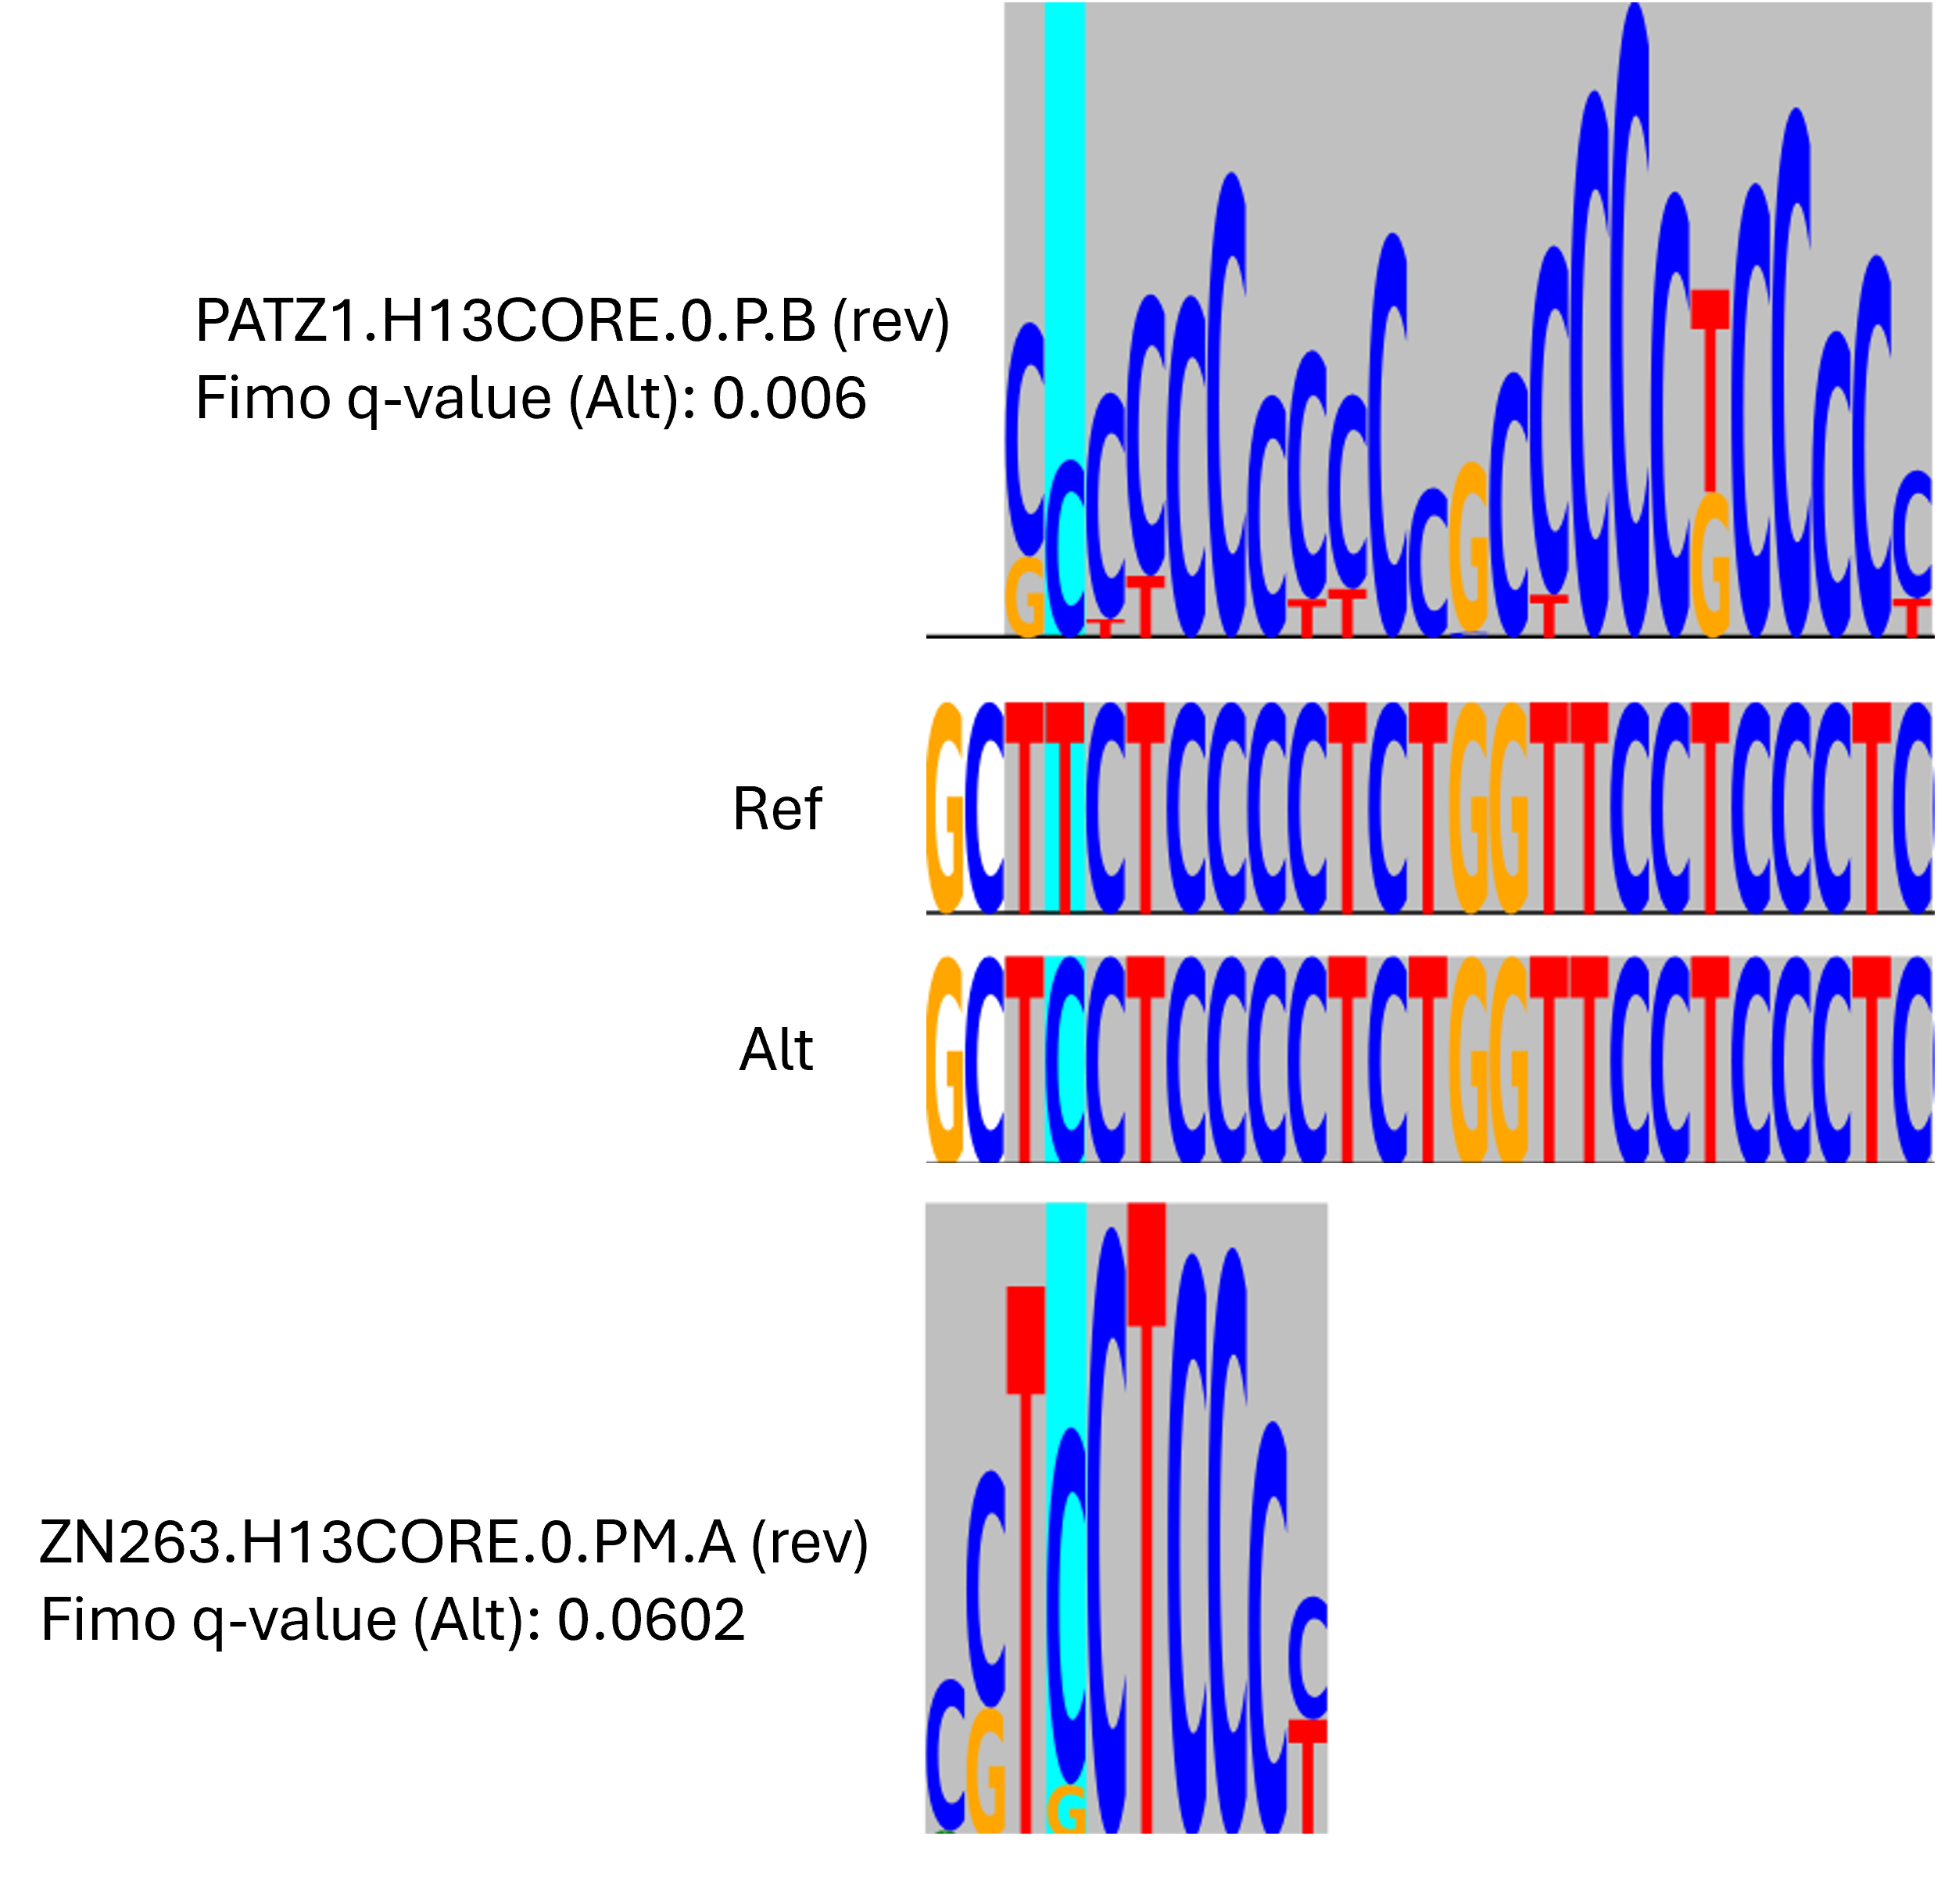 🖼️

##### 👁️ Which TFBS fits better by eye?

But by eye, I would say that the bottom one matches more important nucleotides. 🎯 Note that it is known that the p- and q-values are not reliable when comparing motifs with different lengths, because longer motifs get a lower p-value more easily. However, we can use a **bitscore** 📊 which is measured with a unified size around the variant position to make motifs of different sizes comparable. ⚖️

In [34]:
from Bio import motifs

# Function used to compute the local bitscore
def extract_motif_names(meme_file):
    motif_names = []
    with open(meme_file, "r") as f:
        for line in f:
            if line.startswith("MOTIF"):
                motif_name = line.split(" ", 1)[1].strip()
                motif_names.append(motif_name)
    return motif_names


# Read the used motif file and extract the motifs
meme_file = "resources/hocomoco_v13/H13CORE_meme_format.meme"
motif_names = extract_motif_names(meme_file)

# Add the name while loading the file using Biopython
hocomoco_motif_dict = {}
with open(meme_file) as handle:
    motif_list = motifs.parse(handle, "pfm-four-columns")
    i = 0
    for motif in motif_list:
        motif.name = motif_names[i]
        hocomoco_motif_dict[motif.name] = motif
        i += 1


def reverse_complement(seq):
    complement = str.maketrans("ACGTacgt", "TGCAtgca")
    return seq.translate(complement)[::-1]


def local_bitscore_tfbs(motif, sequence, motif_start, motif_end, variant_pos, strand):
    """
    Calculate the local bitscore for a given motif and sequence, using a window of 5 bases around the variant position.
    """
    zero_based_motif_start = motif_start - 1  # start should be 0-based and end 1-based
    pwm = motif.pwm
    zero_based_variant_pos = variant_pos - 1

    # Get only subset of sequence which is overlapped with the motif
    sequence_of_interest_start = max(zero_based_motif_start, zero_based_variant_pos - 5)
    sequence_of_interest_end = min(motif_end, zero_based_variant_pos + 5)

    motif_related_start = max(0, sequence_of_interest_start - zero_based_motif_start)
    motif_related_end = min(motif_end - zero_based_motif_start, sequence_of_interest_end - zero_based_motif_start)

    # Normalize the score for the length of the motif
    additional_score = 10 - (motif_related_end - motif_related_start)
    motif_sequence = sequence[zero_based_motif_start:motif_end]
    
    # Use the reverse complement sequence if the hit is on the "-" strand
    if strand == "-":
        motif_sequence = reverse_complement(motif_sequence)
    
    motif_part = motif_sequence[motif_related_start:motif_related_end]
    
    # Crop the PWM to the motif-related part
    modified_pwm = {nuc: scores[motif_related_start:motif_related_end] for nuc, scores in pwm.items()}

    return additional_score + round(sum(modified_pwm[nuc][i] for i, nuc in enumerate(motif_part)), 4)

Calculate a bitscore for each motif match in the context of the variant position. 🧮 We extract a sequence around the variant position with the same length as the motif and calculate the bitscore of that sequence with the motif PWM. 📊

In [35]:
variant_overlapping_tfbs['REF_bit_score'] = variant_overlapping_tfbs.apply(
    lambda row: local_bitscore_tfbs(
        motif=hocomoco_motif_dict[row["motif_id"]],
        sequence=row['ref_sequence'],
        motif_start=row['start'],
        motif_end=row['stop'],
        variant_pos=row['variant_pos'],
        strand=row['strand']
    ),
    axis=1
)
variant_overlapping_tfbs['ALT_bit_score'] = variant_overlapping_tfbs.apply(
    lambda row: local_bitscore_tfbs(
        motif=hocomoco_motif_dict[row["motif_id"]],
        sequence=row['alt_sequence'],
        motif_start=row['start'],
        motif_end=row['stop'],
        variant_pos=row['variant_pos'],
        strand=row['strand']
    ),
    axis=1
)

variant_overlapping_tfbs['max_bit_score'] = variant_overlapping_tfbs[['REF_bit_score', 'ALT_bit_score']].max(axis=1).round(3)

> **✅ Result:**  
> The bitscore now correctly ranks motif fits. 🎯  
> - **Higher bitscore = better motif fit** 📈
> - Filter for a minimal bitscore to avoid weak matches ⚠️

In [36]:
interesting_columns =["variant_id", "motif_id", "clinical_significance", "max_bit_score"]

variant_overlapping_tfbs.sort_values(by='max_bit_score', ascending=False).drop_duplicates(subset='variant_id', keep='first')[interesting_columns].head(10)

,variant_id,motif_id,clinical_significance,max_bit_score
436,5-1295225-C-T,BMAL1.H13CORE.0.PSM.A,Uncertain significance,9.742
31,5-1294992-C-T,ZN740.H13CORE.0.P.C,Likely benign,9.372
188,5-1295075-G-A,CGGBP1.H13CORE.0.PSGIB.A,Uncertain significance,9.323
271,5-1295113-G-A,VEZF1.H13CORE.0.P.C,Likely pathogenic,9.183
96,5-1295020-C-G,BMAL1.H13CORE.0.PSM.A,Uncertain significance,9.124
501,5-1295234-A-G,USF3.H13CORE.0.PSGIB.A,Benign,9.049
336,5-1295136-A-G,ZBT7A.H13CORE.0.P.B,Uncertain significance,9.000
12,5-1294991-G-A,ZN740.H13CORE.0.P.C,Uncertain significance,8.891
382,5-1295163-C-G,ZN263.H13CORE.0.PM.A,Likely benign,8.862
171,5-1295046-T-G,ZN335.H13CORE.1.P.D,Conflicting classifications of pathogenicity,8.756


Let's look at the highest difference between reference and alternative allele bitscores: 📊🔍

In [37]:
interesting_columns = ["variant_id", "motif_id", "clinical_significance", "REF_bit_score", "ALT_bit_score", "delta_bit_score"]

variant_overlapping_tfbs['delta_bit_score'] = (
    variant_overlapping_tfbs['ALT_bit_score'] - variant_overlapping_tfbs['REF_bit_score']
).round(3).abs()

variant_overlapping_tfbs.sort_values(by='delta_bit_score', ascending=False).drop_duplicates(
    subset='variant_id', keep='first'
)[interesting_columns].head(10)

,variant_id,motif_id,clinical_significance,REF_bit_score,ALT_bit_score,delta_bit_score
351,5-1295136-A-G,ZN740.H13CORE.0.P.C,Uncertain significance,7.6070,8.6070,1.0
300,5-1295135-G-A,ELK4.H13CORE.0.PSM.A,Pathogenic,5.7691,6.7691,1.0
87,5-1294995-G-T,ZIC5.H13CORE.1.M.C,Likely benign,6.4204,5.4206,1.0
132,5-1295034-C-A,ELF5.H13CORE.1.S.B,Uncertain significance,5.4470,6.4470,1.0
165,5-1295046-T-G,ELK4.H13CORE.0.PSM.A,Conflicting classifications of pathogenicity,7.0339,8.0339,1.0
276,5-1295113-G-A,ZXDB.H13CORE.0.PI.A,Likely pathogenic,6.7684,7.7684,1.0
49,5-1294994-G-C,ZN740.H13CORE.0.P.C,Uncertain significance,7.9700,6.9700,1.0
479,5-1295225-C-T,TFEC.H13CORE.1.SM.B,Uncertain significance,6.1831,7.1831,1.0
95,5-1295020-C-G,BHE41.H13CORE.0.PSM.A,Uncertain significance,6.8903,5.8903,1.0
70,5-1294994-G-T,ZN740.H13CORE.0.P.C,Likely benign,7.9700,6.9700,1.0


Does this result make sense? 🤔 For example, the variant **5-1295135-G-A** creates a strong match for multiple motifs like ELK4 and GABPA in the alternative allele. See here: 👇

In [38]:
variant_overlapping_tfbs[variant_overlapping_tfbs['variant_id'] == "5-1295135-G-A"].sort_values(
    by='delta_bit_score', ascending=False
)[interesting_columns]

,variant_id,motif_id,clinical_significance,REF_bit_score,ALT_bit_score,delta_bit_score
298,5-1295135-G-A,ELF5.H13CORE.1.S.B,Pathogenic,6.4505,7.4505,1.000
293,5-1295135-G-A,ELF2.H13CORE.1.M.B,Pathogenic,5.7412,6.7412,1.000
294,5-1295135-G-A,ELF3.H13CORE.0.S.B,Pathogenic,6.0119,7.0115,1.000
300,5-1295135-G-A,ELK4.H13CORE.0.PSM.A,Pathogenic,5.7691,6.7691,1.000
299,5-1295135-G-A,ELK1.H13CORE.0.PSM.A,Pathogenic,6.1845,7.1844,1.000
310,5-1295135-G-A,GABPA.H13CORE.0.PSM.A,Pathogenic,6.1235,7.1235,1.000
296,5-1295135-G-A,ELF4.H13CORE.1.M.B,Pathogenic,5.6496,6.6496,1.000
297,5-1295135-G-A,ELF5.H13CORE.0.PSM.A,Pathogenic,5.3126,6.3114,0.999
295,5-1295135-G-A,ELF4.H13CORE.0.PS.A,Pathogenic,6.6359,7.6339,0.998
290,5-1295135-G-A,EHF.H13CORE.0.P.B,Pathogenic,5.3913,6.3883,0.997


Do we have more functional evidence? **YES!** 🎉 Saturation mutagenesis experiments (so-called Massively Parallel Reporter Assays, MPRAs) have shown that this variant creates a new binding site for GABPA, which leads to increased TERT expression and is linked to cancer. 🔬📈

Please go to https://kircherlab.bihealth.org/satMutMPRA/ → **Promoter: TERT**, **Variant plot** and locate your variants. What do you see? 👀

**🤔 BTW, what is an MPRA?** That you will learn next in `Epigenetic Data and Regulatory Codes: Machine Learning Perspectives` 🚀